# DUN 21.04.16

## Intermitencja

Zjawiska zachodzące "z przerwami". Często w hydrodynamice.

**Intermitencja przestrzenna** - turbulencja, laminarny, turbulencja, laminarny...

**Intermitencja w dziedzinie czasu**
Dwa rodzaje:
* Pomeau Manneville (regularna), obszary całkowicie periodycznego zachowania
* Intermitencja chaos-chaos: chaos A, chaos B, chaos A


### Dygresyjka: uczenie monośladowe

> Przekleństwo waszej szkoły podstawowej gdzie uczono was testów

> patrz: P. Wilkoń :)


### Wracając do Rayleigha-Benarda:

Dwie płyty, między nimi gaz (często hel przez fakt, że liczbę Reynoldsa można tam zmieniać w szerokim zakresie). Gradient temperatury tworzy rolki konwekcyjne. [Bardzo fajna symulacja jest na przykład tutaj](http://www.mis.mpg.de/applan/research/rayleigh.html).

Naszą zmienną $x$ jest tutaj pionowa prędkość cieczy w funkcji czasu. Parametrem kontrolnym liczba Rayleigha Re. W odpowiednich wartościach Re: regularne okresowe fluktuacje prędkości.

> Fizyka atmosfery: niże i wyże to to samo zjawisko + siła Coriolisa

Rys. 63 W5S2. Zwiększając Re: oscylacja i nagle skok wartości prędkości, w nieregularnych odstępach. Jest to chaos!

W miarę zwiększania Re obszary laminarne coraz krótsze, wybuchy chaotyczne coraz częstsze.

### Bifurkacje generyczne

Pomeau, Manneville wykombinowali (mocno kombinując z hydrodynamiką) trzy rodzaje bifurkacji *generycznych* (występują często, nie muszą być wszystkimi). **Każda bifurkacja odpowiada jakiemuś rodzajowi intermitencji.**

### Bifurkacja styczna
Gdy odwzorowanie jest blisko i nad styczną, układ wpada w kanał intermitencyjny. W5S3 rys1. W rejonie niechaotycznym są **dwie gałęzie układu, jedna stabilna, druga niestabilna**. Pojawianie się "ducha" punktu stałego: blisko kanału intermitencyjnego wykładnik Lyapunova dodatni, ale niewielki (układ wolno ucieka z kanału).

To się pojawia na granicach między oknami periodycznymi a obszarami chaotycznymi w logmapie!
![Logmapa - diagram](BifurcationDiagram.png)

Tangencjalna zachodzi na początku wszystkich okien periodycznych (r: 3.62, 3.84). Ciemne linie na lewo od bifurkacji obrazują, ile mamy kanałów intermitencyjnych na danym r.

### Ogólny obraz:
Poniżej pewnego r krytycznego mamy kanał intermitencyjny, zaś powyżej - dwa punkty stałe, jeden stabilny, drugi niestabilny. **To jest bifurkacja siodło-węzeł**. Więcej o nich: Strogatz, str ~45.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

def f(x, r):
    return r*x*(1-x)

x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
ax.plot(x, x)
ax.set_xlim(0.4,0.6)
ax.set_ylim(0.4,0.6)
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
l1, = ax.plot(x, x)
title = ax.set_title("r=")

def animate(r):
    fr = lambda x: f(x, r)
    y = fr(fr(fr(x)))
    l1.set_ydata(y)
    title.set_text("r={}".format(r))
    return [l1, title]

anim = animation.FuncAnimation(fig, animate, frames=np.linspace(3.8, 3.86, 60), interval=100)
# anim.save("animation.mp4", dpi=200)
anim

### Rzut globalny koło r=3.84

Zwróć uwagę na trzy kanały intermitencyjne!

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

def f(x, r):
    return r*x*(1-x)

x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
ax.plot(x, x)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
l1, = ax.plot(x, x)
title = ax.set_title("r=")

def animate(r):
    fr = lambda x: f(x, r)
    y = fr(fr(fr(x)))
    l1.set_ydata(y)
    title.set_text("r={}".format(r))
    return [l1, title]

anim = animation.FuncAnimation(fig, animate, frames=np.linspace(3.8, 3.86, 60), interval=100)
# anim.save("animation.mp4", dpi=200)
anim

In [ ]:
from logistic import *
%matplotlib inline

In [ ]:
Histogram(r=3.827, Map=logistic, N_zlozenia =3, x_0 = 0.163157)

Kanały - przepływ laminarny. Turbulencja poza tym

"Reinjection probability density" - prawdopodobieństwo wejścia z powrotem do kanału

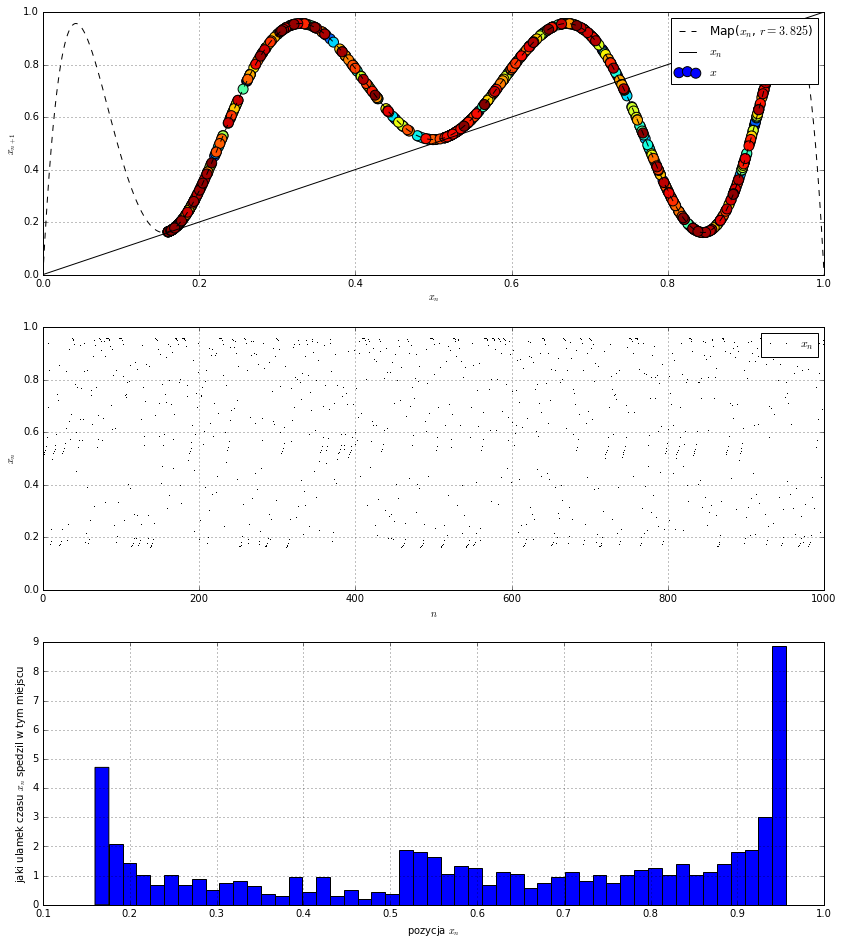

In [5]:
Histogram(r=3.825, Map=logistic, N_zlozenia =3, x_0 = 0.5)

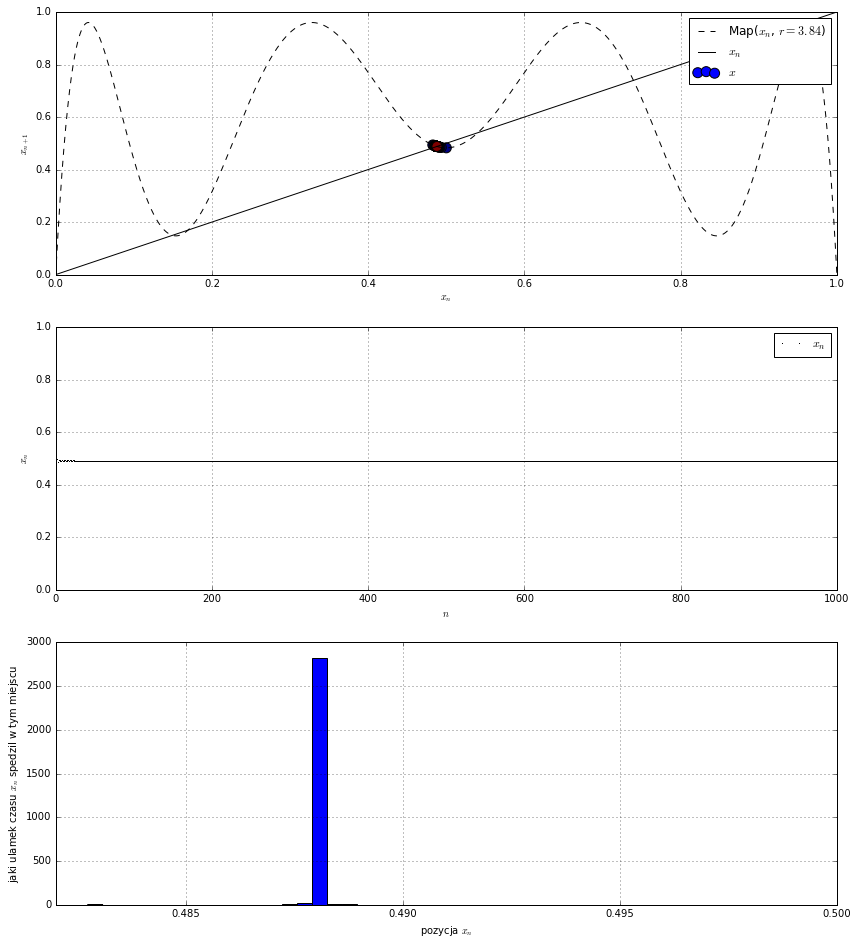

In [6]:
Histogram(r=3.84, Map=logistic, N_zlozenia =3, x_0 = 0.5)

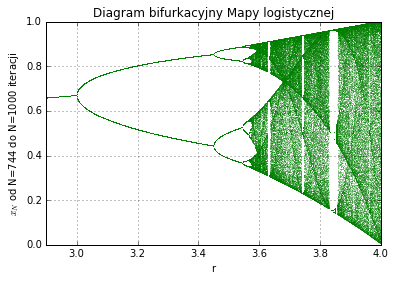

In [7]:
draw_orbits()

W miejscu kanału spowolnienie. Analogia: spowolnienie krytyczne w pobliżu przejścia fazowego w statystyce.

Powyżej wartości krytycznej: bifurkacja styczna, 3 punkty stabilne (węzły), 3 punkty niestabilne (siodłowe).

### Punkt siodłowy w 1D

Ustawiamy punkt krytyczny (r) i zaczynamy blisko 0.5. Z lewej strony (zaczynając z 0.49) - przyciąga, z prawej (0.52) - odpycha. Siodło, a jako jeszcze szczególniejszy przypadek: **punkt półstabilny**.

**Dalej polecam Strogatza, strony koło 45!**

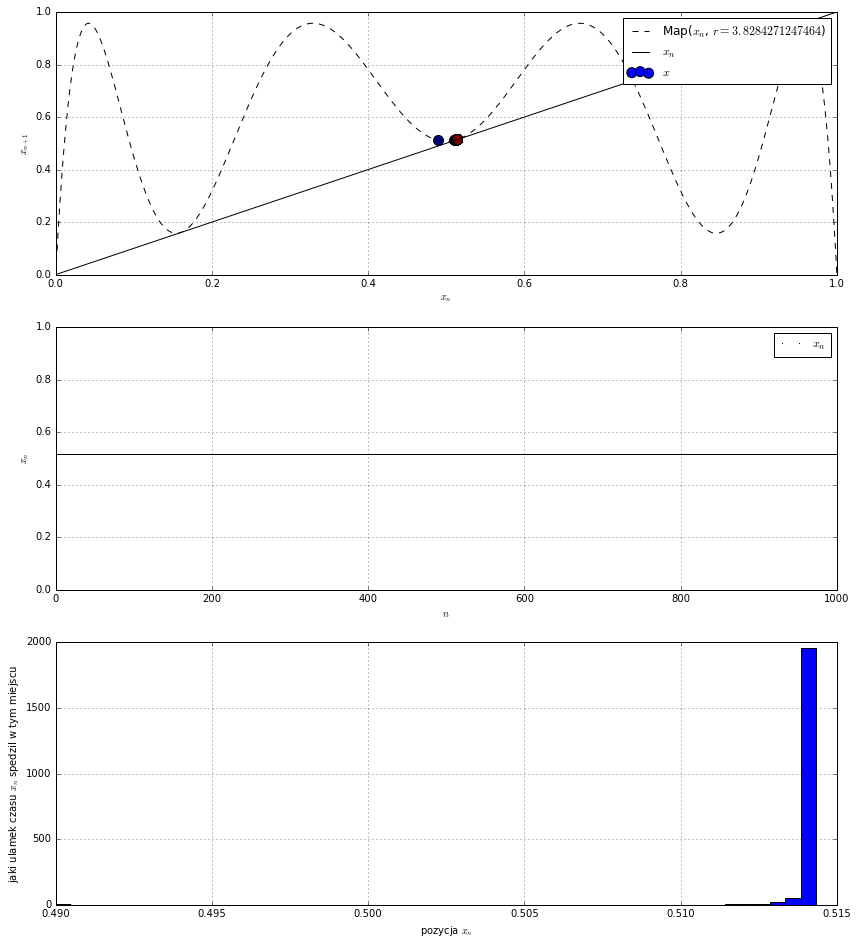

In [12]:
Histogram(r=3.8284271247464, Map=logistic, N_zlozenia =3, x_0 = 0.49)

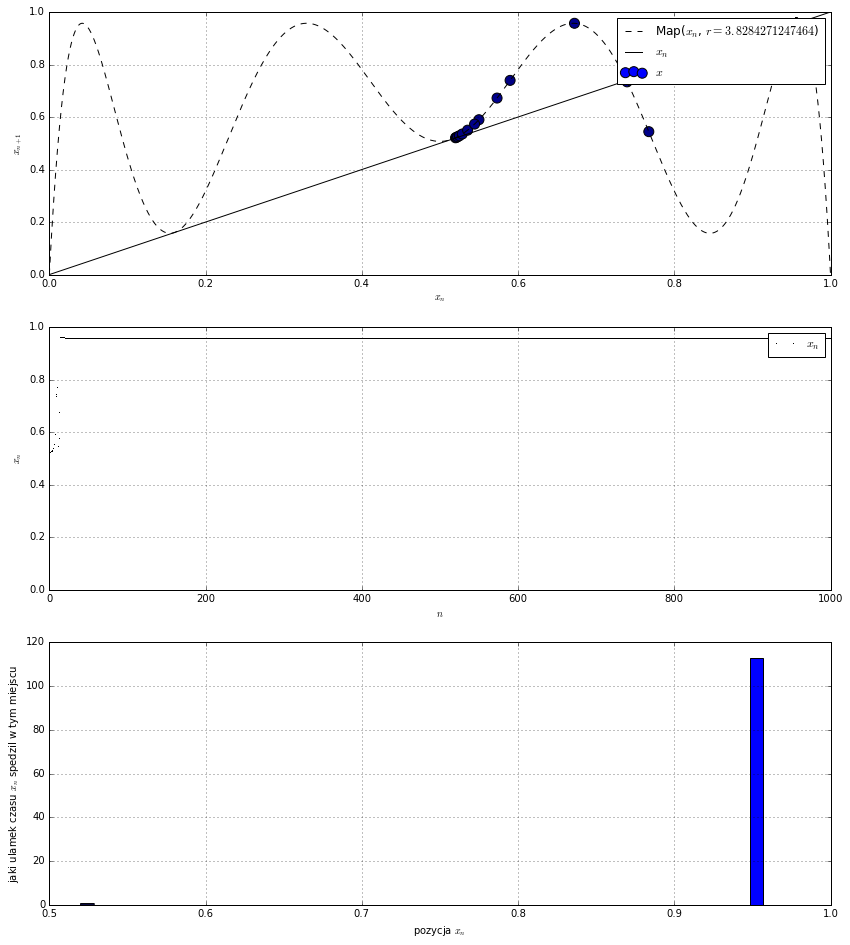

In [13]:
Histogram(r=3.8284271247464, Map=logistic, N_zlozenia =3, x_0 = 0.52)

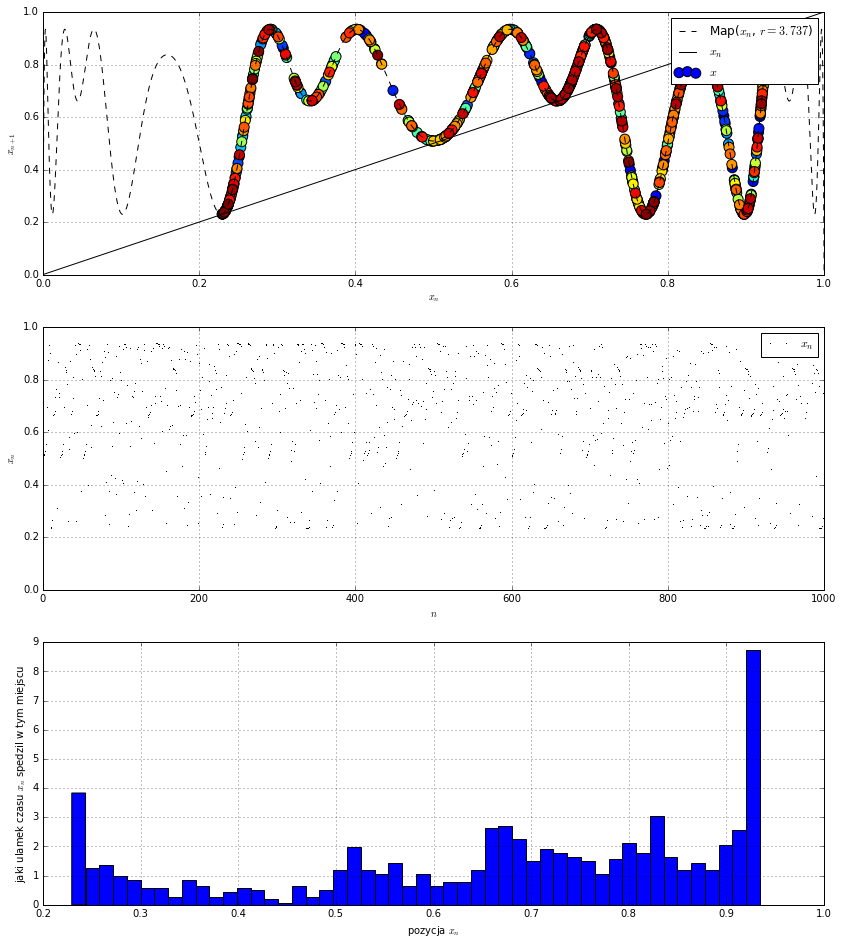

In [14]:
Histogram(r=3.737, Map=logistic, N_zlozenia =5, x_0 = 0.499)

### Długość obszarów laminarnych dla intermitencji typu 1

Czyli: jak układ wpadnie w fazę laminarną, jak długo (statystycznie) będzie w niej siedział?

Rozwijamy potrójne złożenie log-mapy (przypadek szczególny, tą łatwo analizować) na szereg wzdłuż dwóch argumentów. Wystarczy kwadratowy wyraz w odległości od argumentu krytycznego (tej połówki) oraz liniowy w odległości od krytycznego parametru r. Zamieniamy zmienne (normalizacja wzg. pochodnej po r i wycentrowanie x wzg. argumentu krytycznego).

$$y_{n+1} = y_n + a y^2_n + \epsilon$$
$$\epsilon = r - r_c$$
($r_c$ - r w którym pojawia się bifurkacja)

Kanał intermitencyjny jest wąski - definiujemy szerokość przez wartość progową c
$$|y_n| < c << 1$$

Wtedy można zamiast powyższej mapy zrobić różniczkowe:

$$\frac{dy}{dl} = a y^2 + \epsilon$$

Ma analityczne rozwiązanie, pozwala nam określić ile iteracji układ spędza w środku kanału (zależnie od punktów wejścia i wyjścia)

Założenie: kanał jest symetryczny (to jest parabola - w różniczkowym jest, w logistycznym niekoniecznie - dlatego przechodzimy do granicy i rozpisujemy to na szereg). Wniosek: prawdopodobieństwo wejścia jest funkcją parzystą punktu wejścia.

To nam pozwala, całkując $P*l$ od -c do c, policzyć średnią liczbę iteracji w kanale.

Wychodzi ok! Nachylenie średniej liczby iteracji w kanale $\sim \epsilon^{-1/2}$, widać na wykresie log-log $<l>(\epsilon)$ (W5S10).

### Typ 2: Bifurkacja Hopfa
Tworzy oscylacje w układach z czasem ciągłym. Wrócimy do niej [później](DUN-mapy-dwuwymiarowe.ipynb), bo w jednowymiarowych nie występuje. Przykład z elektroniki: generator - nic nic nic, oscylacja.
### Typ 3: Odwrotna bifurkacja podwajania okresu.
Odwrotna bifurkacja podwajania okresu. Gałąź centralna i stabilna, dwie niestabilne gałęzie, styczność z chaosem. Strogatz mówi na to [*subcritical pitchfork bifurcation*](https://en.wikipedia.org/wiki/Pitchfork_bifurcation).

### Przykłady poszczególnych intermitencji
1. Typ I, bifurkacja styczna:
    1. Logmapa, jak mówiliśmy powyżej
    2. Laser 4-poziomowy (natężenie od czasu, zmieniając siłę pompowania). Pięknie widać nachylenie $-1/2$ na log-logu średniej długości fazy laminarnej od parametru (siły pompowania).
2. Typ II, bifurkacja Hopfa:
    * Coming soon, w dalszej części wykładu
    * Prowadzi od punktu stałego do cyklu granicznego (drgania w układzie).
3. Typ III, OBPO (Odwrotna Bifurkacja Podwajania Okresu) zwane też przez niektórych Strogatzów subcritical pitchfork bifurcation:
    * Konwekcja Rayleigha Benarda: prędkość cieczy w pionie od czasu, zależnie od liczby Rayleigha (pojawiały się coraz częstsze fazy laminarne w coraz większych Re)
    * Nieliniowy układ elektroniczny z diodą, pulsy napięcia (W3S15, *chaotic burst*...)
### Rozkład prawdopodobieństwa czasu siedzenia w kanale intermitencyjnym
Kształt zależy od odwzorowania i to pozwala je często odróżnić.
1. Kształt U (dwie pionowe asymptoty) między 0 a $\epsilon^{-1/2}$. Można dodać szum i będziemy mieć jedyne skończony peak w tym krytycznym $\epsilon^{-1/2}$ (szerokość połówkowa i "rozpuszczanie" rezonansu?)
2. Bifurkacja Hopfa: ruch po spirali (trzeba to sobie wyobrazić w 2D, nawet w biegunowym, stała prędkość fazowa, wielomian 3 stopnia. Rozkład: wykładnicze opadanie, blisko zera $l^{-2}$, bardzo  podobne do 3 :(
3. Oscylacje sygnału wokół 0. Rozkład: blisko zera - $l^{-3/2}$, dalej wykładnicze opadania.

Żeby rozróżnić 2 i 3 trzeba patrzeć na sygnał (spirala a oscylowanie ze znakiem).

### Szum $1/f$

Jakiś dziwnie popularny w przyrodzie. Natężenie szumu (kwadrat modułu) jest często proporcjonalne do $1/f$...

I o nim później, w [kolejnym wykładzie!](DUN8_szumy.ipynb)